In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import warnings

In [2]:
# 忽略警告、确定绘图风格、解决绘图中文报错
warnings.filterwarnings('ignore')
plt.style.use('classic')
mpl.rcParams['font.family'] = 'SimHei'

性别 / 标称 / -- / M， F， I （婴儿）<br>
长度<br>
直径<br>
高度带壳<br>
整鲍<br>
肉<br>
肠道重量（出血后）<br>
壳重量<br>
年龄<br>

In [3]:
names = ['sex','cd','zj','dk_gd','zb_zl','r_zl','cd_zl','k_zl','age']
features = pd.read_csv('../data/abalone.data',names=names)
features.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/abalone.data'

In [4]:
# 数据维度
features.shape

(4177, 9)

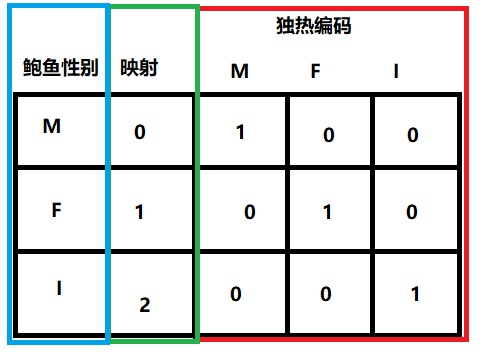

In [5]:
# pandas 自带独热编码
features = pd.get_dummies(features)
features.head()

,cd,zj,dk_gd,zb_zl,r_zl,cd_zl,k_zl,age,sex_F,sex_I,sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [6]:
#  特征值(features)和标签值(labels)-->（x,y）
labels = features.age
features = features.drop('age',axis=1)

In [7]:
# 提取特征值的名字
features_list = list(features.columns)

In [8]:
# 数据集分裂
from sklearn.model_selection import train_test_split
train_features,test_features,train_labels,test_labels = train_test_split(features,labels,test_size=0.3,random_state=0)
print('训练集',train_labels.shape)
print('测试集',test_features.shape)

训练集 (2923,)
测试集 (1254, 10)


In [9]:
# 随机森林
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=1000,random_state=0)
rf.fit(train_features,train_labels)
# 预测
predictions = rf.predict(test_features)

In [10]:
# 计算误差
errors = abs(predictions - test_labels)
mape = 100 * (errors / test_labels)
print('MAPE：',np.mean(mape))

MAPE： 15.352038455640608


In [11]:
# 误差偏大（树模型的角度考虑）
# 绘制树模型
from sklearn.tree import export_graphviz
import pydot

In [12]:
# 拿到一棵树
tree = rf.estimators_[4]
tree
# # 导出树模型的dot文件
export_graphviz(tree,out_file='tree.dot',feature_names=features_list,rounded=True,precision=1)
(graph,) = pydot.graph_from_dot_file('C:\\Users\\DELL\\Desktop\\实验室课程\\code\\tree.dot')
graph.write_jpg('tree.jpg')

In [13]:
# 后剪枝
rf_small = RandomForestRegressor(n_estimators=10,max_depth=3,random_state=42)
rf_small.fit(train_features,train_labels)
tree_small = rf_small.estimators_[5]
# # 导出树模型的dot文件
export_graphviz(tree_small,out_file='small_tree.dot',feature_names=features_list,rounded=True,precision=1)
(graph,) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_jpg('samll_tree.jpg')

In [14]:
predictions = rf_small.predict(test_features)
# 计算误差
errors = abs(predictions - test_labels)
mape = 100 * (errors / test_labels)
print('MAPE：',np.mean(mape))

MAPE： 16.687099567100635


[('k_zl', 0.5), ('r_zl', 0.17), ('zb_zl', 0.08), ('cd_zl', 0.07), ('cd', 0.05), ('zj', 0.05), ('dk_gd', 0.05), ('sex_I', 0.02), ('sex_F', 0.01), ('sex_M', 0.01)]


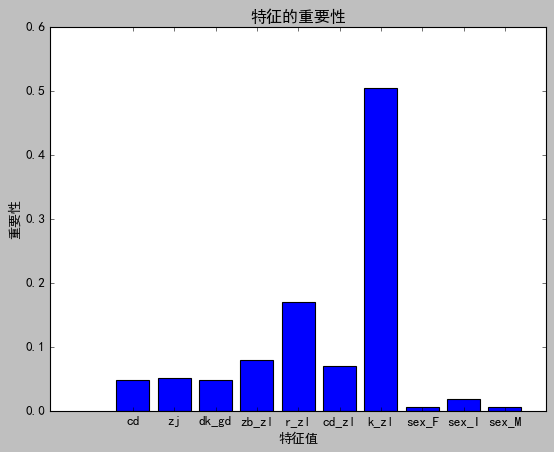

In [26]:
# 随机森林筛选重要的特征值
importances = list(rf.feature_importances_)
features_importance = [(feature,round(importance,2)) for feature,importance in zip(features_list,importances)]
features_importance = sorted(features_importance,key=lambda x:x[1],reverse=True)
# 参数的重要程度可视化
x_values = list(range(len(importances)))
plt.bar(x_values,importances)
plt.xticks(x_values,features_list)
plt.xlabel('特征值')
plt.ylabel('重要性')
plt.title('特征的重要性')
print(features_importance)

In [34]:
# 重要特征选择
train_important = train_features.iloc[:,:7]
test_important = test_features.iloc[:,:7]
train_important

,cd,zj,dk_gd,zb_zl,r_zl,cd_zl,k_zl
1376,0.620,0.510,0.175,1.2815,0.5715,0.2385,0.3900
1225,0.345,0.255,0.085,0.2005,0.1050,0.0370,0.0500
2722,0.375,0.275,0.095,0.2295,0.0950,0.0545,0.0660
3387,0.545,0.410,0.145,0.8730,0.3035,0.1960,0.3100
2773,0.580,0.465,0.145,0.9865,0.4700,0.2155,0.2500
...,...,...,...,...,...,...,...
1033,0.650,0.525,0.185,1.6220,0.6645,0.3225,0.4770
3264,0.655,0.500,0.140,1.1705,0.5405,0.3175,0.2850
1653,0.595,0.450,0.145,0.9590,0.4630,0.2065,0.2535
2607,0.625,0.490,0.165,1.1270,0.4770,0.2365,0.3185


In [35]:
# 选择重要的特征值做预测
rf_most_important = RandomForestRegressor(n_estimators=1000,random_state=42)
rf_most_important.fit(train_important,train_labels)
prediction_important = rf_most_important.predict(test_important)
# 计算误差
errors = abs(prediction_important - test_labels)
mape = 100 * (errors / test_labels)
print('MAPE：',np.mean(mape))

MAPE： 15.579063665376617


In [37]:
# 参数调节的方法来提升模型的指标
# 随机参数搜索法
from sklearn.model_selection import RandomizedSearchCV
# 树模型的个数
n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
# 最大特征选择
max_features = ['auto','sqrt']
# 树模型的最大深度
max_depth = [int(x) for x in np.linspace(10,30,2)]
# 节点的最小分裂样本
min_samples_split = [2,5,10]
# 最小叶子节点数
min_samples_leaf = [1,2,4]
# 是否选择bootstrap采样方案
bootstrap = [True,False]
# 构建参数空间（为RandomizedSearchCV提供随机参数组合样本）
random_grid ={
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap':bootstrap,}

In [38]:
# 随机参数组合训练
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=random_grid,
    n_iter=100,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1)
rf_random.fit(train_features,train_labels)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [39]:
# 最好的参数组合
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

In [42]:
rf_best = RandomForestRegressor(
     n_estimators=600,
     min_samples_split=5,
     min_samples_leaf=4,
     max_features='sqrt',
     max_depth=30,
     bootstrap=True)
rf_best.fit(train_features,train_labels)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=5, n_estimators=600)

In [43]:
# 随机组合最好的参数
preditction_best = rf_best.predict(test_features)
# 计算误差
errors = abs(preditction_best - test_labels)
mape = 100 * (errors / test_labels)
print('MAPE：',np.mean(mape))

MAPE： 15.01897729891379


In [46]:
# 网格搜索法进行参数选择
from sklearn.model_selection import GridSearchCV
# {'n_estimators': 600,
#  'min_samples_split': 5,
#  'min_samples_leaf': 4,
#  'max_features': 'sqrt',
#  'max_depth': 30,
#  'bootstrap': True}
# 网格参数搜索空间
parm_grid ={
    'n_estimators':[100,300,600,900,1200,1500],
    'max_features':['sqrt'],
    'max_depth':[15,20,25,30,35,40,45],
    'min_samples_split':[3,5,7,9],
    'min_samples_leaf':[2,3,4,5,6],
    'bootstrap':[True]}
# 模型
rf = RandomForestRegressor()
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=parm_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    verbose=2)
grid_search.fit(train_features,train_labels)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [15, 20, 25, 30, 35, 40, 45],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [3, 5, 7, 9],
                         'n_estimators': [100, 300, 600, 900, 1200, 1500]},
             scoring='neg_mean_absolute_error', verbose=2)

In [47]:
# 网格搜索确认最好的参数组合
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 35,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 900}

In [50]:
rf_grid = RandomForestRegressor(bootstrap=['True'],
                           max_depth=35,
                           max_features='sqrt',
                           min_samples_leaf=4,
                           min_samples_split=3,
                           n_estimators=900)
rf_grid.fit(train_features,train_labels)

RandomForestRegressor(bootstrap=['True'], max_depth=35, max_features='sqrt',
                      min_samples_leaf=4, min_samples_split=3,
                      n_estimators=900)

In [51]:
# 随机组合最好的参数
preditction_best_grid = rf_grid.predict(test_features)
# 计算误差
errors = abs(preditction_best_grid - test_labels)
mape = 100 * (errors / test_labels)
print('MAPE：',np.mean(mape))

MAPE： 15.011071438591197


结论：
1. 使用训练集为原始的训练集
2. 使用的最好的参数选择为<br>
{'bootstrap': True,
 'max_depth': 35,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 900}

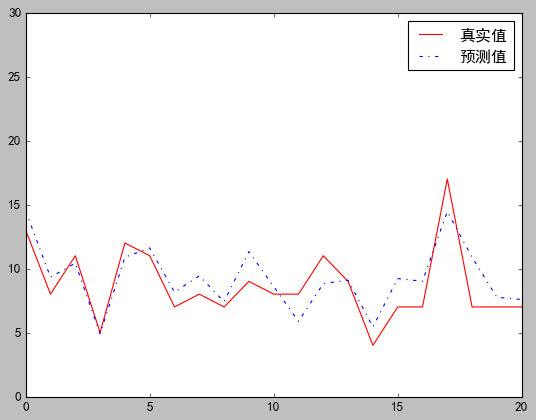

In [66]:
# 拟合图像
x = range(0,len(test_labels))
plt.plot(x,test_labels,'r-',label='真实值')
plt.plot(x,preditction_best_grid,'b-.',label='预测值')
plt.xlim(0,20)
plt.legend()

In [67]:
# 模型保存
import joblib
joblib.dump(rf_grid,filename='rf_abalone.pkl')

['rf_abalone.pkl']

In [75]:
new_data = np.array([0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0,0,1]).reshape(1,-1)
# new_data
# # 模型预测
model = joblib.load(filename='../model/rf_abalone.pkl')
model.predict(new_data)

array([8.55963261])